In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.metrics import precision_score, recall_score, f1_score, precision_recall_curve, f1_score
import matplotlib.pyplot as plt


Mounted at /content/drive


In [11]:
import pandas as pd

# Assuming your file is in Excel format, use read_excel
data = pd.read_csv('/content/drive/MyDrive/bangladesh_student/Impact_ChatGPT.csv')
data.head()

,What is your university name ?,What is your current level of education?,How often do you use AI tools like ChatGPT for academic purposes?,How do you think ChatGPT has influenced teaching methods in your courses?,Has ChatGPT influenced your approach to solving complex academic problems or assignments ?,Do you use ChatGPT for group study or collaborative learning ?,Do you feel that AI assists you in self-paced learning ?,Does ChatGPT help improve critical thinking and problem-solving?,Has ChatGPT provided useful guidance on your career path or educational choices ?\n,How worried are you about the privacy and safety of your personal data when using AI tools like ChatGPT for academic tasks?,Do you think relying too much on AI tools like ChatGPT could harm students creativity and critical thinking skills?,Do you believe using AI tools like ChatGPT reduces your creativity and critical thinking?,Do you believe AI tools (like ChatGPT) improve your learning experience?
0,Daffodil International University,Undergraduate,Daily,It has improved teaching methods significantly,Yes,Yes,Yes,Yes,Yes,Somewhat worried,Neutral,No,Yes
1,Daffodil International University,Undergraduate,Monthly,It has improved teaching methods significantly,Yes,Sometime,Yes,Yes,Yes,Somewhat worried,Agree,Yes,Maybe
2,Daffodil International University,Undergraduate,Daily,It has improved teaching methods significantly,Yes,Yes,Yes,Yes,Yes,Not worried,Agree,Sometimes,Yes
3,Daffodil International University,Undergraduate,Daily,It has improved teaching methods significantly,Yes,Yes,Yes,Yes,Yes,Not worried,Agree,Sometimes,Yes
4,DIU,Undergraduate,Monthly,It has slightly improved teaching methods,Yes,Yes,Yes,Yes,Yes,Somewhat worried,Agree,Yes,No


In [12]:
import pandas as pd

# Read the original file
data = pd.read_csv('/content/drive/MyDrive/bangladesh_student/Impact_ChatGPT.csv')

# Define the mapping from old names to new names
rename_map = {
    "What is your university name ?": "university",
    "What is your current level of education?": "education_level",
    "How often do you use AI tools like ChatGPT  for academic purposes?": "academic_chatgpt_use_frequency",
    "How do you think ChatGPT has influenced teaching methods in your courses?": "influence_on_teaching",
    "Has ChatGPT influenced your approach to solving complex academic problems or  assignments  ? ": "influence_on_problem_solving",
    "Do you use ChatGPT for group study or collaborative learning ?": "group_collaboration_usage",
    "Do you feel that AI assists you in self-paced learning ?": "self_paced_learning_support",
    " Does ChatGPT help improve critical thinking and problem-solving?": "critical_thinking_support",
    "Has ChatGPT provided useful guidance on your career path or educational choices ?\n": "career_guidance_support",
    "How worried are you about the privacy and safety of your personal data when using AI tools like ChatGPT for academic tasks?": "data_privacy_concern",
    "Do you think relying too much on AI tools like ChatGPT could harm students creativity and critical thinking skills?": "overreliance_harm_concern",
    "Do you believe using AI tools like ChatGPT reduces your creativity and critical thinking?": "perceived_creativity_reduction",
    "Do you believe AI tools (like ChatGPT) improve your learning experience?": "learning_experience_improvement"
}

# Rename the columns
data = data.rename(columns=rename_map)

# Save to the new file
output_path = '/content/drive/MyDrive/bangladesh_student/Impact_ChatGPT1.csv'
data.to_csv(output_path, index=False)

# Preview the first few rows
print(data.head())


                           university education_level  \
0  Daffodil International University    Undergraduate   
1  Daffodil International University    Undergraduate   
2  Daffodil International University    Undergraduate   
3  Daffodil International University    Undergraduate   
4                                 DIU   Undergraduate   

  academic_chatgpt_use_frequency  \
0                          Daily   
1                        Monthly   
2                          Daily   
3                          Daily   
4                        Monthly   

                            influence_on_teaching  \
0  It has improved teaching methods significantly   
1  It has improved teaching methods significantly   
2  It has improved teaching methods significantly   
3  It has improved teaching methods significantly   
4       It has slightly improved teaching methods   

  influence_on_problem_solving group_collaboration_usage  \
0                          Yes                       Yes   
1

In [13]:
import pandas as pd

# Assuming your file is in Excel format, use read_excel
data = pd.read_csv('/content/drive/MyDrive/bangladesh_student/Impact_ChatGPT1.csv')
data.head()

,university,education_level,academic_chatgpt_use_frequency,influence_on_teaching,influence_on_problem_solving,group_collaboration_usage,self_paced_learning_support,critical_thinking_support,career_guidance_support,data_privacy_concern,overreliance_harm_concern,perceived_creativity_reduction,learning_experience_improvement
0,Daffodil International University,Undergraduate,Daily,It has improved teaching methods significantly,Yes,Yes,Yes,Yes,Yes,Somewhat worried,Neutral,No,Yes
1,Daffodil International University,Undergraduate,Monthly,It has improved teaching methods significantly,Yes,Sometime,Yes,Yes,Yes,Somewhat worried,Agree,Yes,Maybe
2,Daffodil International University,Undergraduate,Daily,It has improved teaching methods significantly,Yes,Yes,Yes,Yes,Yes,Not worried,Agree,Sometimes,Yes
3,Daffodil International University,Undergraduate,Daily,It has improved teaching methods significantly,Yes,Yes,Yes,Yes,Yes,Not worried,Agree,Sometimes,Yes
4,DIU,Undergraduate,Monthly,It has slightly improved teaching methods,Yes,Yes,Yes,Yes,Yes,Somewhat worried,Agree,Yes,No


In [14]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/bangladesh_student/Impact_ChatGPT1.csv')

# One-hot encoding columns
one_hot_cols = ['education_level', 'academic_chatgpt_use_frequency']
data = pd.get_dummies(data, columns=one_hot_cols)

# Label encoding columns
label_encode_cols = [
    'university',
    'influence_on_teaching',
    'influence_on_problem_solving',
    'group_collaboration_usage',
    'self_paced_learning_support',
    'critical_thinking_support',
    'career_guidance_support',
    'data_privacy_concern',
    'overreliance_harm_concern',
    'perceived_creativity_reduction',
    'learning_experience_improvement'
]

le = LabelEncoder()
for col in label_encode_cols:
    data[col] = le.fit_transform(data[col].astype(str))  # Ensures no NaNs or unexpected types

# Save the updated dataset
data.to_csv('/content/drive/MyDrive/bangladesh_student/Impact_ChatGPT2.csv', index=False)

# Display first few rows
print(data.head())


   university  influence_on_teaching  influence_on_problem_solving  \
0          75                      2                             2   
1          75                      2                             2   
2          75                      2                             2   
3          75                      2                             2   
4          67                      3                             2   

   group_collaboration_usage  self_paced_learning_support  \
0                          2                            2   
1                          1                            2   
2                          2                            2   
3                          2                            2   
4                          2                            2   

   critical_thinking_support  career_guidance_support  data_privacy_concern  \
0                          2                        2                     1   
1                          2                        2 

In [15]:
import pandas as pd

# Assuming your file is in Excel format, use read_excel
data = pd.read_csv('/content/drive/MyDrive/bangladesh_student/Impact_ChatGPT2.csv')
data.head()

,university,influence_on_teaching,influence_on_problem_solving,group_collaboration_usage,self_paced_learning_support,critical_thinking_support,career_guidance_support,data_privacy_concern,overreliance_harm_concern,perceived_creativity_reduction,learning_experience_improvement,education_level_Postgraduate,education_level_Undergraduate,academic_chatgpt_use_frequency_Daily,academic_chatgpt_use_frequency_Monthly,academic_chatgpt_use_frequency_Never,academic_chatgpt_use_frequency_Weekly
0,75,2,2,2,2,2,2,1,2,0,2,False,True,True,False,False,False
1,75,2,2,1,2,2,2,1,0,2,0,False,True,False,True,False,False
2,75,2,2,2,2,2,2,0,0,1,2,False,True,True,False,False,False
3,75,2,2,2,2,2,2,0,0,1,2,False,True,True,False,False,False
4,67,3,2,2,2,2,2,1,0,2,1,False,True,False,True,False,False


In [3]:
# Split features and target
X = data.drop('learning_experience_improvement', axis=1)
y = data['learning_experience_improvement']

# Display the encoded dataset
print(X)
print(y)

      university  influence_on_teaching  influence_on_problem_solving  \
0             75                      2                             2   
1             75                      2                             2   
2             75                      2                             2   
3             75                      2                             2   
4             67                      3                             2   
...          ...                    ...                           ...   
3505         121                      2                             2   
3506         121                      3                             0   
3507         121                      1                             1   
3508         121                      0                             1   
3509         121                      3                             2   

      group_collaboration_usage  self_paced_learning_support  \
0                             2                            

In [4]:
from sklearn.model_selection import train_test_split
# Split the data into train, test, and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.8034188034188035
Weighted Precision: 0.7358896500000794
Micro Precision: 0.8034188034188035
Macro Precision: 0.5503346346904628
Precision per class: [0.31818182 0.5        0.83282209]
Classification Report:
              precision    recall  f1-score   support

           0       0.32      0.07      0.11       107
           1       0.50      0.36      0.42        39
           2       0.83      0.98      0.90       556

    accuracy                           0.80       702
   macro avg       0.55      0.47      0.48       702
weighted avg       0.74      0.80      0.75       702



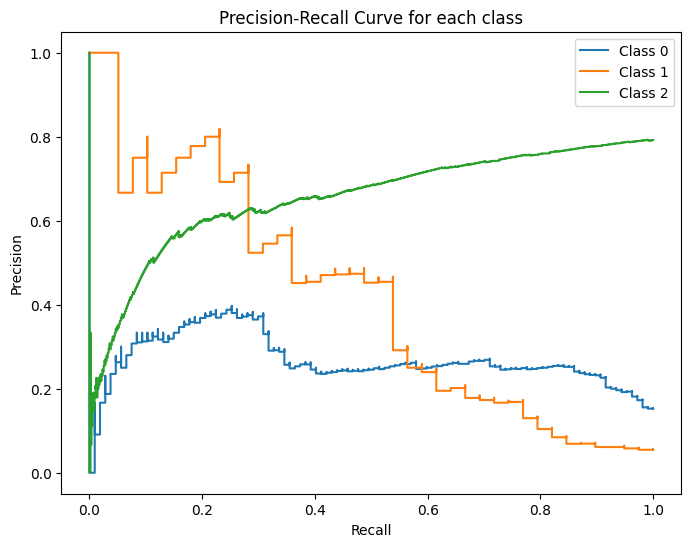

/tmp/ipython-input-5-520975820.py:61: RuntimeWarning: invalid value encountered in divide
  f1_values = 2 * (precision * recall) / (precision + recall)
/tmp/ipython-input-5-520975820.py:61: RuntimeWarning: invalid value encountered in divide
  f1_values = 2 * (precision * recall) / (precision + recall)


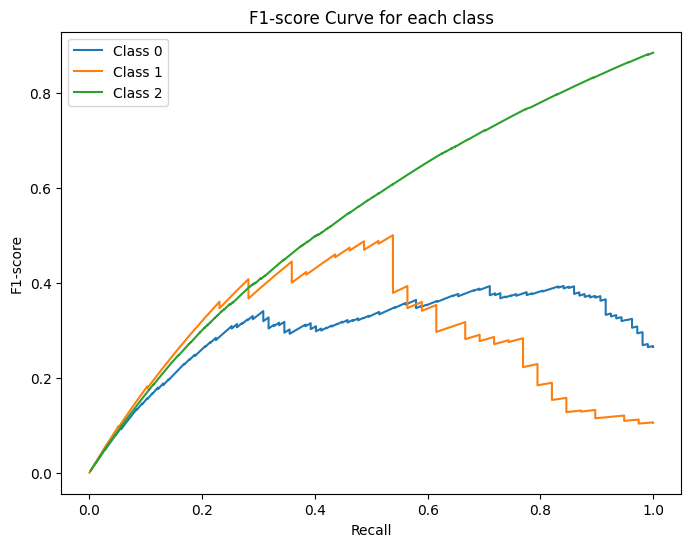

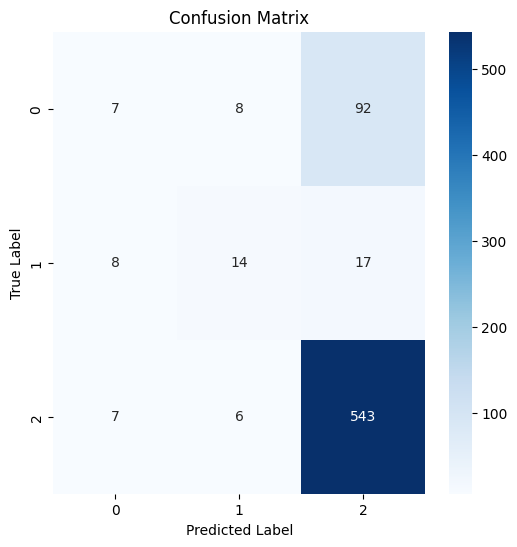

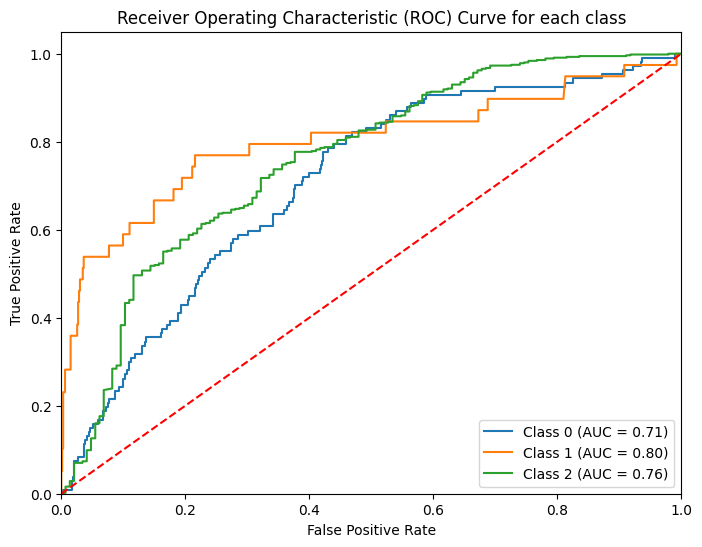

In [5]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize the logistic regression classifier
logistic_classifier = LogisticRegression(max_iter=1000)

# Train the model
logistic_classifier.fit(X_train, y_train)

# Model testing and evaluation
y_pred = logistic_classifier.predict(X_test)

# Calculate accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred)
precision_weighted = precision_score(y_test, y_pred, average='weighted')
precision_micro = precision_score(y_test, y_pred, average='micro')
precision_macro = precision_score(y_test, y_pred, average='macro')
precision_per_class = precision_score(y_test, y_pred, average=None)

print("Accuracy:", accuracy)
print("Weighted Precision:", precision_weighted)
print("Micro Precision:", precision_micro)
print("Macro Precision:", precision_macro)
print("Precision per class:", precision_per_class)

# Generate and plot classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# Calculate ROC curve and AUC
y_pred_probs = logistic_classifier.predict_proba(X_test)[:, 1]

# Plot Precision-Recall curve for each class
plt.figure(figsize=(8, 6))
classes = np.unique(y_test)
for class_label in classes:
    y_binary = (y_test == class_label).astype(int)
    class_probs = y_pred_probs  # Use the calculated y_pred_probs
    precision, recall, _ = precision_recall_curve(y_binary, class_probs)
    plt.step(recall, precision, label=f'Class {class_label}')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for each class')
plt.legend()
plt.show()

# Plot F1-score curve
plt.figure(figsize=(8, 6))
for class_label in classes:
    y_binary = (y_test == class_label).astype(int)
    precision, recall, _ = precision_recall_curve(y_binary, y_pred_probs)
    f1_values = 2 * (precision * recall) / (precision + recall)
    plt.plot(recall, f1_values, label=f'Class {class_label}')

plt.xlabel('Recall')
plt.ylabel('F1-score')
plt.title('F1-score Curve for each class')
plt.legend()
plt.show()

# Plot Confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Calculate ROC curve and AUC for each class
y_pred_probs = logistic_classifier.predict_proba(X_test)
fpr = dict()
tpr = dict()
roc_auc = dict()

# Assuming your classes are encoded as integers starting from 0
classes = np.unique(y_test)

for i, class_label in enumerate(classes):
    y_true_binary = (y_test == class_label).astype(int)
    y_score = y_pred_probs[:, i]

    # Calculate ROC curve for the current class
    fpr[class_label], tpr[class_label], _ = roc_curve(y_true_binary, y_score)

    # Calculate AUC for the current class
    roc_auc[class_label] = auc(fpr[class_label], tpr[class_label])

# Plot ROC curves for each class
plt.figure(figsize=(8, 6))
for class_label in classes:
    plt.plot(fpr[class_label], tpr[class_label], label=f'Class {class_label} (AUC = %0.2f)' % roc_auc[class_label])

plt.plot([0, 1], [0, 1], color='r', linestyle='--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for each class')
plt.legend(loc="lower right")
plt.show()


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [20:39:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.8062678062678063
Weighted Precision: 0.7803577671944172
Micro Precision: 0.8062678062678063
Macro Precision: 0.6125161230882624
Precision per class: [0.45833333 0.51851852 0.86069652]

Classification Report:
               precision    recall  f1-score   support

           0       0.46      0.31      0.37       107
           1       0.52      0.36      0.42        39
           2       0.86      0.93      0.90       556

    accuracy                           0.81       702
   macro avg       0.61      0.53      0.56       702
weighted avg       0.78      0.81      0.79       702



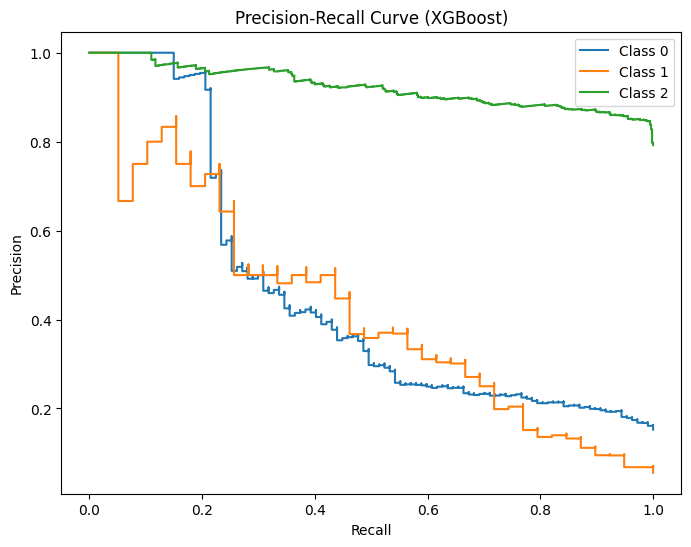

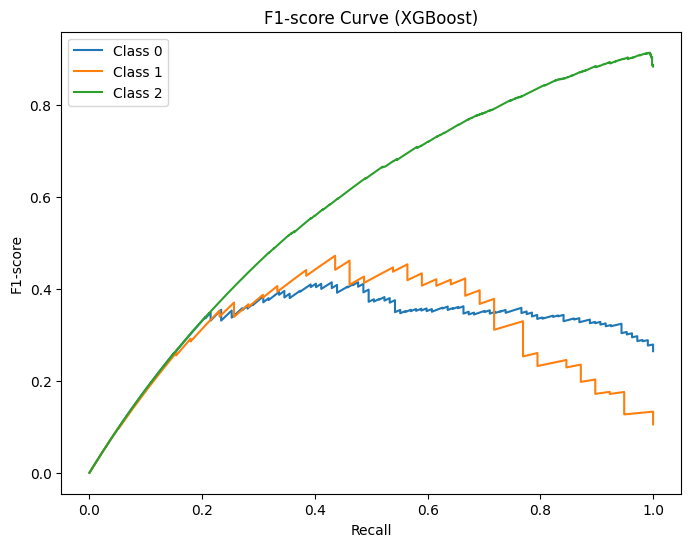

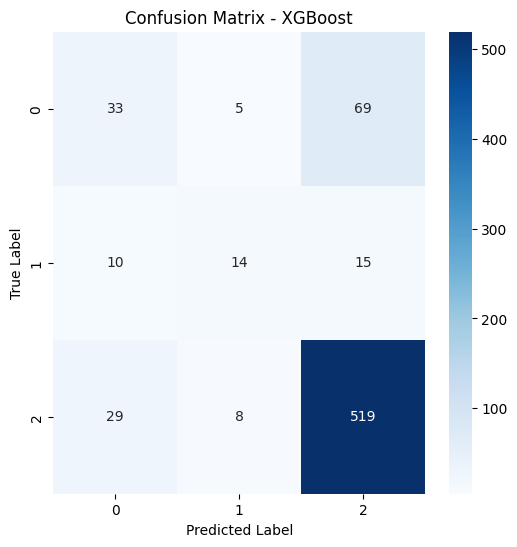

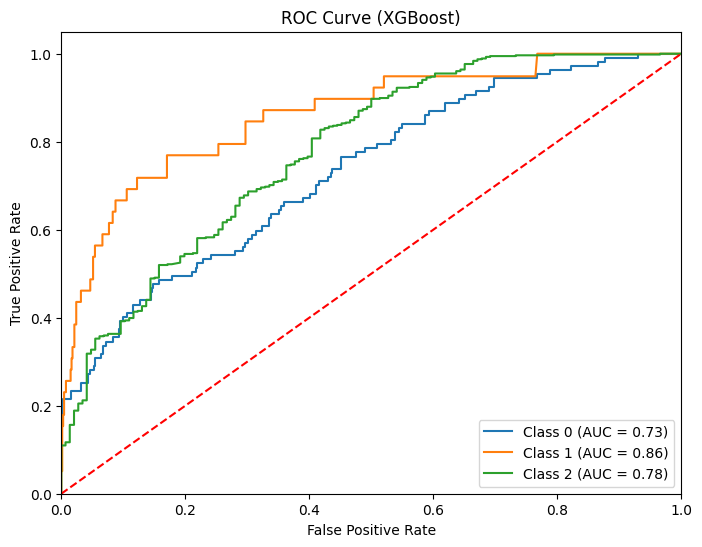

In [6]:
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, classification_report,
    confusion_matrix, roc_curve, auc, precision_recall_curve
)
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize the XGBClassifier (with multiclass handling)
xgb_classifier = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

# Train the model
xgb_classifier.fit(X_train, y_train)

# Model testing and evaluation
y_pred = xgb_classifier.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision_weighted = precision_score(y_test, y_pred, average='weighted')
precision_micro = precision_score(y_test, y_pred, average='micro')
precision_macro = precision_score(y_test, y_pred, average='macro')
precision_per_class = precision_score(y_test, y_pred, average=None)

print("Accuracy:", accuracy)
print("Weighted Precision:", precision_weighted)
print("Micro Precision:", precision_micro)
print("Macro Precision:", precision_macro)
print("Precision per class:", precision_per_class)

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Get class probabilities
y_pred_probs = xgb_classifier.predict_proba(X_test)
classes = np.unique(y_test)

# Precision-Recall Curve
plt.figure(figsize=(8, 6))
for i, class_label in enumerate(classes):
    y_binary = (y_test == class_label).astype(int)
    precision, recall, _ = precision_recall_curve(y_binary, y_pred_probs[:, i])
    plt.step(recall, precision, label=f'Class {class_label}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (XGBoost)')
plt.legend()
plt.show()

# F1-score Curve
plt.figure(figsize=(8, 6))
for i, class_label in enumerate(classes):
    y_binary = (y_test == class_label).astype(int)
    precision, recall, _ = precision_recall_curve(y_binary, y_pred_probs[:, i])
    f1_values = 2 * (precision * recall) / (precision + recall + 1e-6)  # Avoid divide by zero
    plt.plot(recall, f1_values, label=f'Class {class_label}')
plt.xlabel('Recall')
plt.ylabel('F1-score')
plt.title('F1-score Curve (XGBoost)')
plt.legend()
plt.show()

# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - XGBoost')
plt.show()

# ROC Curve per class
fpr, tpr, roc_auc = {}, {}, {}
plt.figure(figsize=(8, 6))
for i, class_label in enumerate(classes):
    y_true_binary = (y_test == class_label).astype(int)
    fpr[class_label], tpr[class_label], _ = roc_curve(y_true_binary, y_pred_probs[:, i])
    roc_auc[class_label] = auc(fpr[class_label], tpr[class_label])
    plt.plot(fpr[class_label], tpr[class_label], label=f'Class {class_label} (AUC = {roc_auc[class_label]:.2f})')

plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (XGBoost)')
plt.legend(loc="lower right")
plt.show()


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000525 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 151
[LightGBM] [Info] Number of data points in the train set: 2246, number of used features: 16
[LightGBM] [Info] Start training from score -1.750759
[LightGBM] [Info] Start training from score -2.929414
[LightGBM] [Info] Start training from score -0.257567
Accuracy: 0.8190883190883191
Weighted Precision: 0.7932794752987358
Micro Precision: 0.8190883190883191
Macro Precision: 0.6535586419952747
Precision per class: [0.50724638 0.59090909 0.86252046]

Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.33      0.40       107
           1       0.59      0.33      0.43        39
           2       0.86      0.95      0.90       556

    accuracy                           0.82     

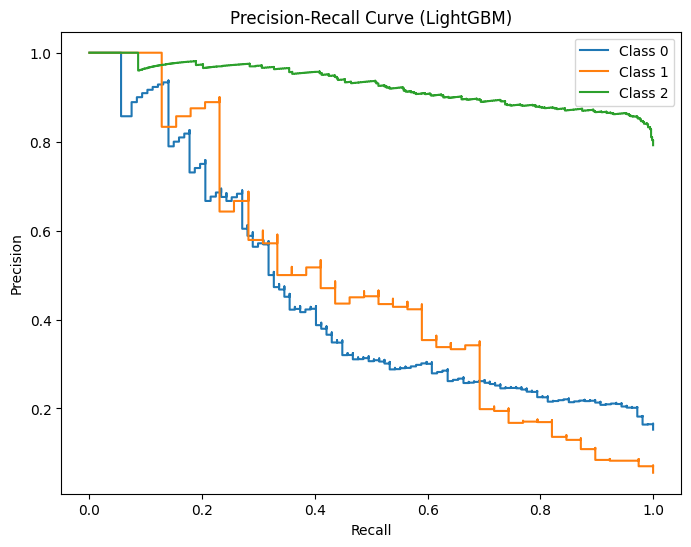

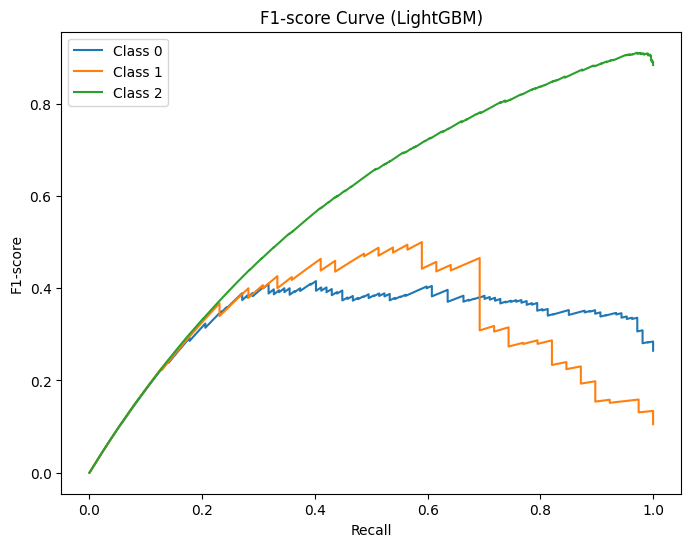

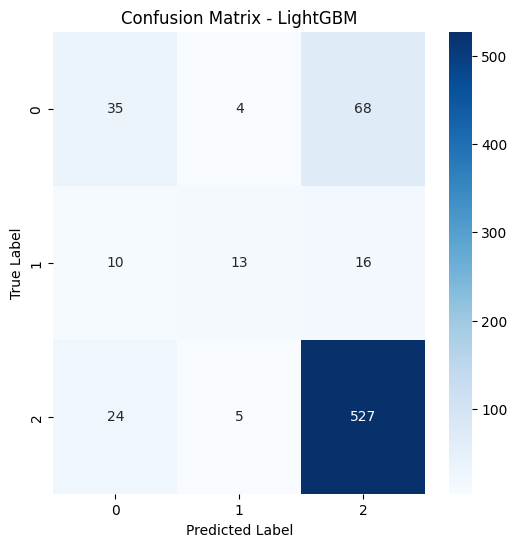

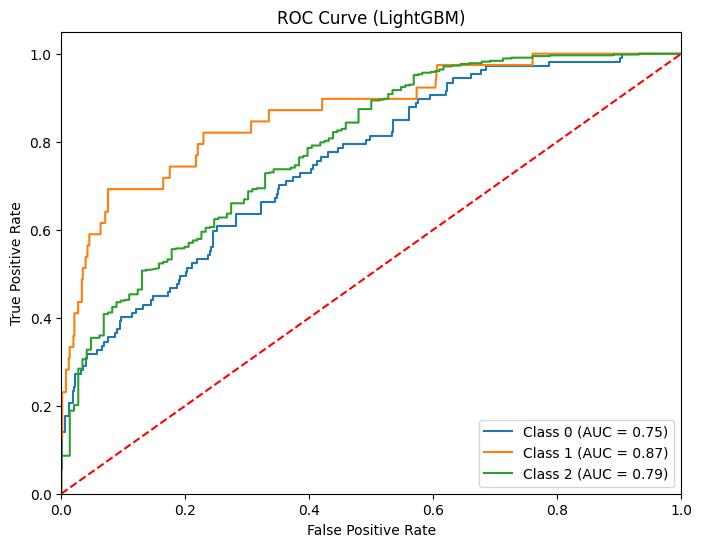

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from lightgbm import LGBMClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, classification_report,
    confusion_matrix, roc_curve, auc, precision_recall_curve
)

# Initialize LightGBM classifier for multiclass
lgb_classifier = LGBMClassifier(objective='multiclass', random_state=42)
lgb_classifier.fit(X_train, y_train)

# Predictions
y_pred = lgb_classifier.predict(X_test)
y_pred_probs = lgb_classifier.predict_proba(X_test)
classes = np.unique(y_test)

# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision_weighted = precision_score(y_test, y_pred, average='weighted')
precision_micro = precision_score(y_test, y_pred, average='micro')
precision_macro = precision_score(y_test, y_pred, average='macro')
precision_per_class = precision_score(y_test, y_pred, average=None)

print("Accuracy:", accuracy)
print("Weighted Precision:", precision_weighted)
print("Micro Precision:", precision_micro)
print("Macro Precision:", precision_macro)
print("Precision per class:", precision_per_class)

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Precision-Recall Curves
plt.figure(figsize=(8, 6))
for i, class_label in enumerate(classes):
    y_binary = (y_test == class_label).astype(int)
    precision, recall, _ = precision_recall_curve(y_binary, y_pred_probs[:, i])
    plt.step(recall, precision, label=f'Class {class_label}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (LightGBM)')
plt.legend()
plt.show()

# F1-score Curves
plt.figure(figsize=(8, 6))
for i, class_label in enumerate(classes):
    y_binary = (y_test == class_label).astype(int)
    precision, recall, _ = precision_recall_curve(y_binary, y_pred_probs[:, i])
    f1_values = 2 * (precision * recall) / (precision + recall + 1e-6)
    plt.plot(recall, f1_values, label=f'Class {class_label}')
plt.xlabel('Recall')
plt.ylabel('F1-score')
plt.title('F1-score Curve (LightGBM)')
plt.legend()
plt.show()

# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - LightGBM')
plt.show()

# ROC Curve and AUC per class
fpr, tpr, roc_auc = {}, {}, {}
plt.figure(figsize=(8, 6))
for i, class_label in enumerate(classes):
    y_true_binary = (y_test == class_label).astype(int)
    fpr[class_label], tpr[class_label], _ = roc_curve(y_true_binary, y_pred_probs[:, i])
    roc_auc[class_label] = auc(fpr[class_label], tpr[class_label])
    plt.plot(fpr[class_label], tpr[class_label], label=f'Class {class_label} (AUC = {roc_auc[class_label]:.2f})')

plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (LightGBM)')
plt.legend(loc="lower right")
plt.show()


Accuracy: 0.8048433048433048
Weighted Precision: 0.7780593783794808
Micro Precision: 0.8048433048433048
Macro Precision: 0.6075466573545959
Precision per class: [0.46478873 0.5        0.85785124]

Classification Report:
               precision    recall  f1-score   support

           0       0.46      0.31      0.37       107
           1       0.50      0.33      0.40        39
           2       0.86      0.93      0.89       556

    accuracy                           0.80       702
   macro avg       0.61      0.53      0.55       702
weighted avg       0.78      0.80      0.79       702



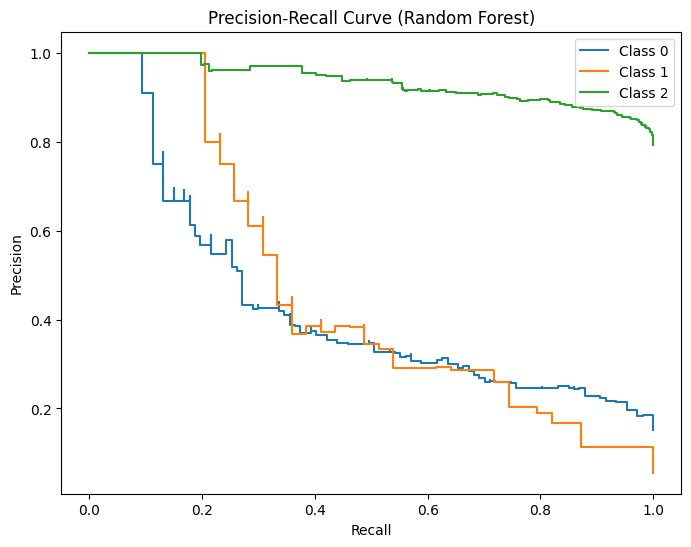

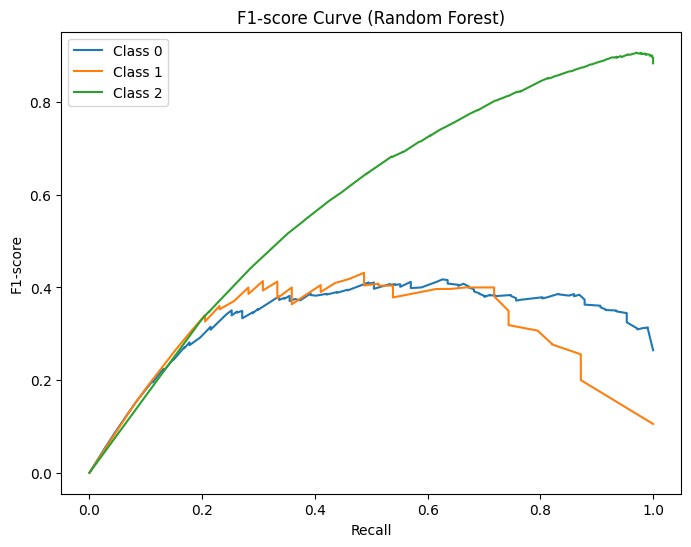

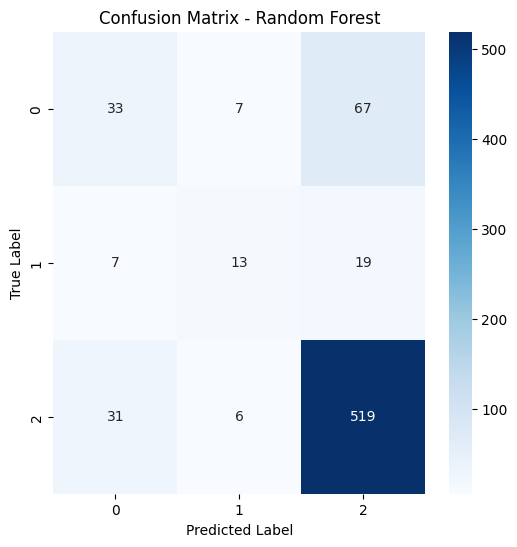

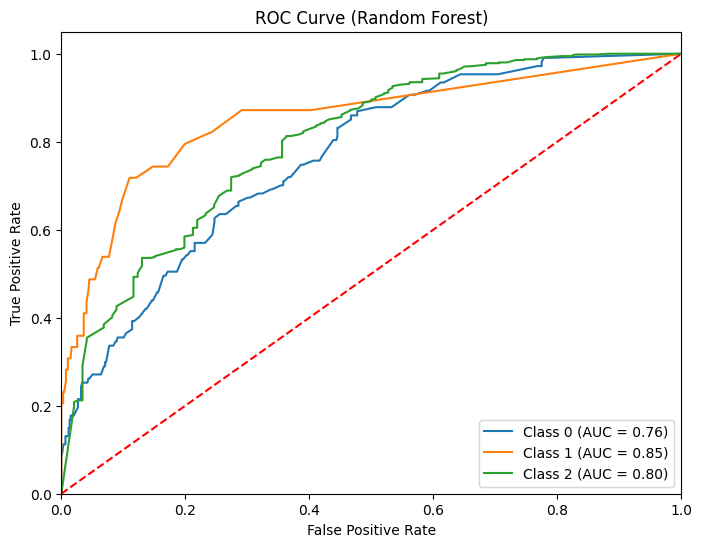

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, classification_report,
    confusion_matrix, roc_curve, auc, precision_recall_curve
)

# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Predictions
y_pred = rf_classifier.predict(X_test)
y_pred_probs = rf_classifier.predict_proba(X_test)
classes = np.unique(y_test)

# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision_weighted = precision_score(y_test, y_pred, average='weighted')
precision_micro = precision_score(y_test, y_pred, average='micro')
precision_macro = precision_score(y_test, y_pred, average='macro')
precision_per_class = precision_score(y_test, y_pred, average=None)

print("Accuracy:", accuracy)
print("Weighted Precision:", precision_weighted)
print("Micro Precision:", precision_micro)
print("Macro Precision:", precision_macro)
print("Precision per class:", precision_per_class)

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Precision-Recall Curve
plt.figure(figsize=(8, 6))
for i, class_label in enumerate(classes):
    y_binary = (y_test == class_label).astype(int)
    precision, recall, _ = precision_recall_curve(y_binary, y_pred_probs[:, i])
    plt.step(recall, precision, label=f'Class {class_label}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Random Forest)')
plt.legend()
plt.show()

# F1-score Curve
plt.figure(figsize=(8, 6))
for i, class_label in enumerate(classes):
    y_binary = (y_test == class_label).astype(int)
    precision, recall, _ = precision_recall_curve(y_binary, y_pred_probs[:, i])
    f1_values = 2 * (precision * recall) / (precision + recall + 1e-6)
    plt.plot(recall, f1_values, label=f'Class {class_label}')
plt.xlabel('Recall')
plt.ylabel('F1-score')
plt.title('F1-score Curve (Random Forest)')
plt.legend()
plt.show()

# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Random Forest')
plt.show()

# ROC Curve and AUC
fpr, tpr, roc_auc = {}, {}, {}
plt.figure(figsize=(8, 6))
for i, class_label in enumerate(classes):
    y_true_binary = (y_test == class_label).astype(int)
    fpr[class_label], tpr[class_label], _ = roc_curve(y_true_binary, y_pred_probs[:, i])
    roc_auc[class_label] = auc(fpr[class_label], tpr[class_label])
    plt.plot(fpr[class_label], tpr[class_label], label=f'Class {class_label} (AUC = {roc_auc[class_label]:.2f})')

plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Random Forest)')
plt.legend(loc="lower right")
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

Accuracy: 0.792022792022792
Weighted Precision: 0.6273001030835789
Micro Precision: 0.792022792022792
Macro Precision: 0.26400759734093066
Precision per class: [0.         0.         0.79202279]

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       107
           1       0.00      0.00      0.00        39
           2       0.79      1.00      0.88       556

    accuracy                           0.79       702
   macro avg       0.26      0.33      0.29       702
weighted avg       0.63      0.79      0.70       702



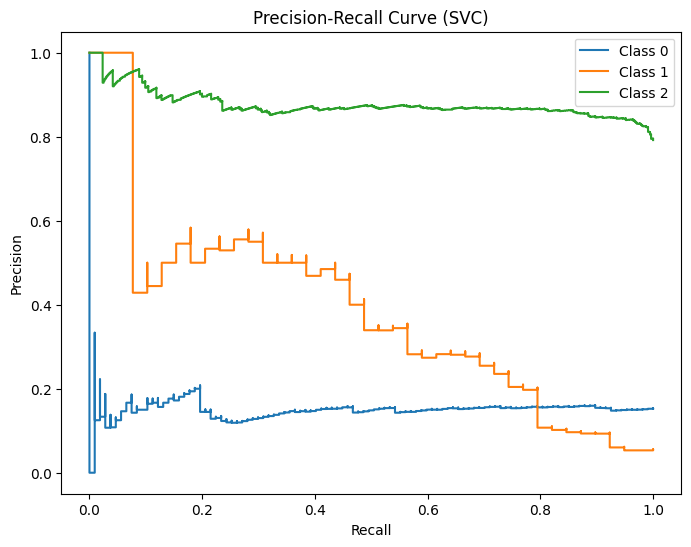

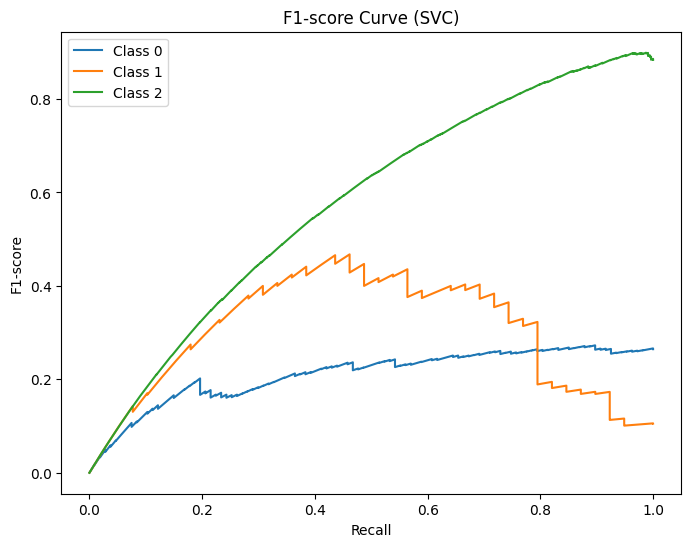

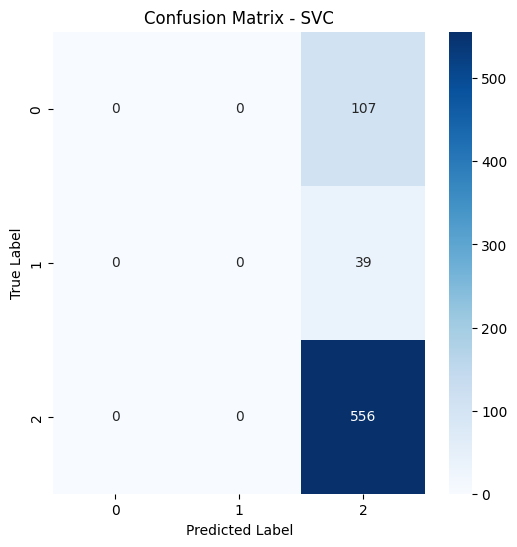

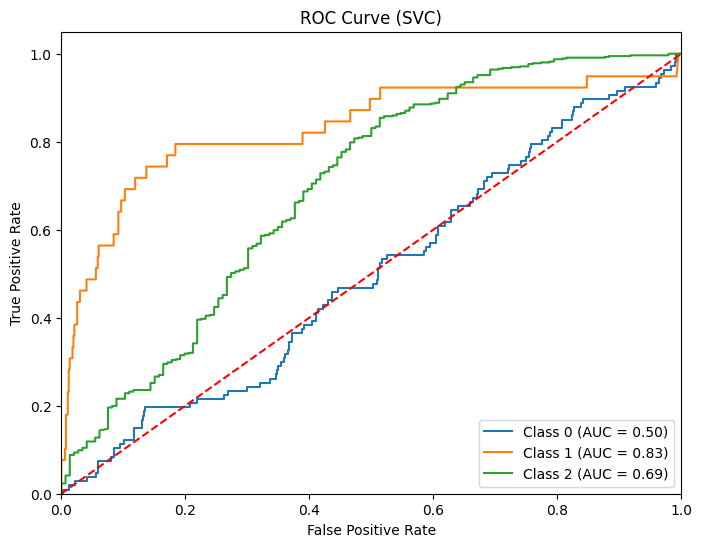

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
)
from sklearn.preprocessing import label_binarize

# Fit SVC with probability estimates enabled
svc_classifier = SVC(probability=True, kernel='rbf', random_state=42)
svc_classifier.fit(X_train, y_train)

# Predict on test data
y_pred = svc_classifier.predict(X_test)
y_pred_probs = svc_classifier.predict_proba(X_test)
classes = np.unique(y_test)

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision_weighted = precision_score(y_test, y_pred, average='weighted')
precision_micro = precision_score(y_test, y_pred, average='micro')
precision_macro = precision_score(y_test, y_pred, average='macro')
precision_per_class = precision_score(y_test, y_pred, average=None)

print("Accuracy:", accuracy)
print("Weighted Precision:", precision_weighted)
print("Micro Precision:", precision_micro)
print("Macro Precision:", precision_macro)
print("Precision per class:", precision_per_class)

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Precision-Recall Curve
plt.figure(figsize=(8, 6))
for i, class_label in enumerate(classes):
    y_binary = (y_test == class_label).astype(int)
    precision, recall, _ = precision_recall_curve(y_binary, y_pred_probs[:, i])
    plt.step(recall, precision, label=f'Class {class_label}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (SVC)')
plt.legend()
plt.show()

# F1-score Curve
plt.figure(figsize=(8, 6))
for i, class_label in enumerate(classes):
    y_binary = (y_test == class_label).astype(int)
    precision, recall, _ = precision_recall_curve(y_binary, y_pred_probs[:, i])
    f1_values = 2 * (precision * recall) / (precision + recall + 1e-6)
    plt.plot(recall, f1_values, label=f'Class {class_label}')
plt.xlabel('Recall')
plt.ylabel('F1-score')
plt.title('F1-score Curve (SVC)')
plt.legend()
plt.show()

# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - SVC')
plt.show()

# ROC Curve and AUC
fpr, tpr, roc_auc = {}, {}, {}
plt.figure(figsize=(8, 6))
for i, class_label in enumerate(classes):
    y_true_binary = (y_test == class_label).astype(int)
    fpr[class_label], tpr[class_label], _ = roc_curve(y_true_binary, y_pred_probs[:, i])
    roc_auc[class_label] = auc(fpr[class_label], tpr[class_label])
    plt.plot(fpr[class_label], tpr[class_label], label=f'Class {class_label} (AUC = {roc_auc[class_label]:.2f})')

plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (SVC)')
plt.legend(loc="lower right")
plt.show()


Accuracy: 0.801994301994302
Weighted Precision: 0.7613987887367311
Micro Precision: 0.801994301994302
Macro Precision: 0.5644254768920246
Precision per class: [0.47457627 0.375      0.84370016]

Classification Report:
               precision    recall  f1-score   support

           0       0.47      0.26      0.34       107
           1       0.38      0.15      0.22        39
           2       0.84      0.95      0.89       556

    accuracy                           0.80       702
   macro avg       0.56      0.46      0.48       702
weighted avg       0.76      0.80      0.77       702



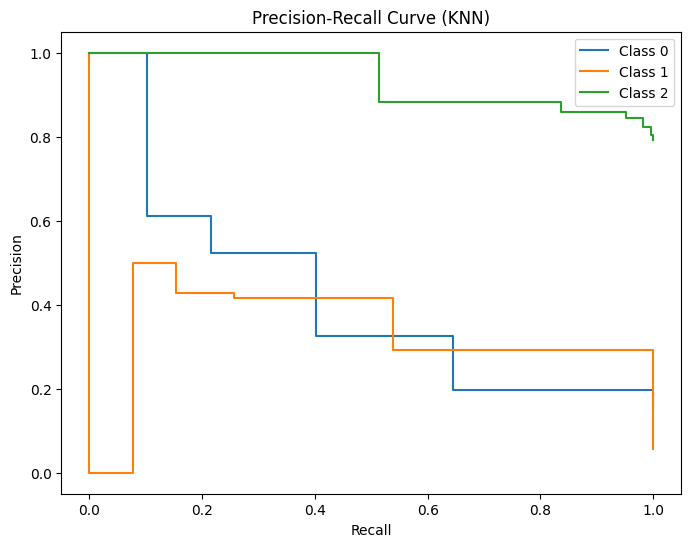

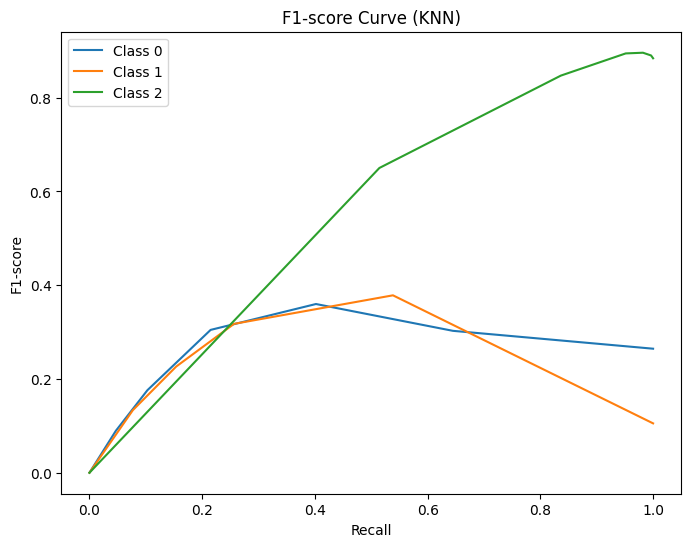

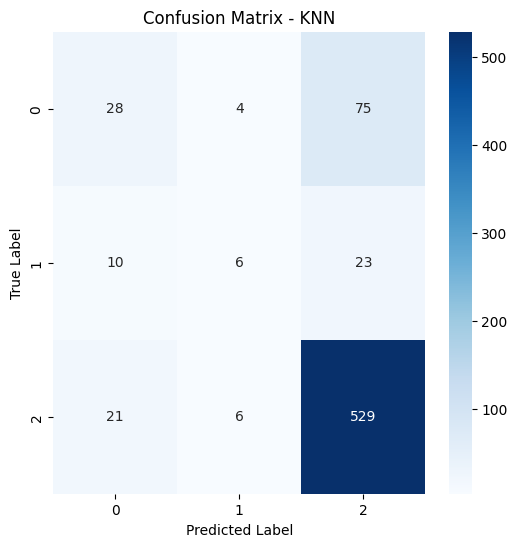

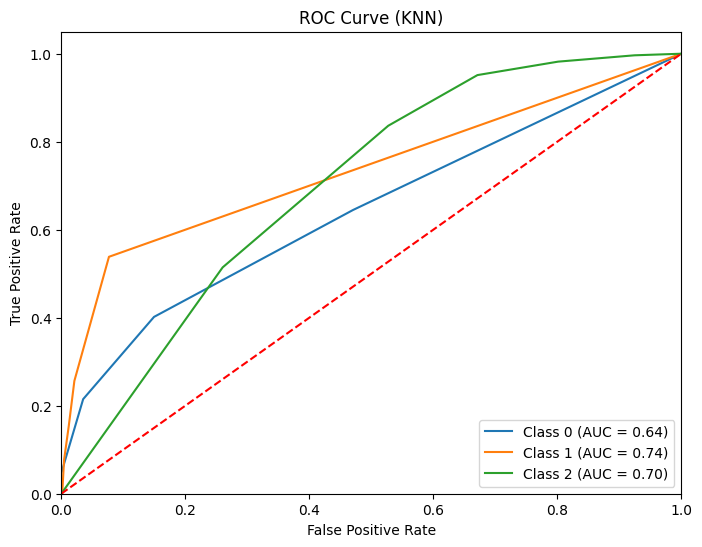

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
)

# Initialize KNN (you can tune n_neighbors)
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)

# Predict on test set
y_pred = knn_classifier.predict(X_test)
y_pred_probs = knn_classifier.predict_proba(X_test)
classes = np.unique(y_test)

# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision_weighted = precision_score(y_test, y_pred, average='weighted')
precision_micro = precision_score(y_test, y_pred, average='micro')
precision_macro = precision_score(y_test, y_pred, average='macro')
precision_per_class = precision_score(y_test, y_pred, average=None)

print("Accuracy:", accuracy)
print("Weighted Precision:", precision_weighted)
print("Micro Precision:", precision_micro)
print("Macro Precision:", precision_macro)
print("Precision per class:", precision_per_class)

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Precision-Recall Curve
plt.figure(figsize=(8, 6))
for i, class_label in enumerate(classes):
    y_binary = (y_test == class_label).astype(int)
    precision, recall, _ = precision_recall_curve(y_binary, y_pred_probs[:, i])
    plt.step(recall, precision, label=f'Class {class_label}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (KNN)')
plt.legend()
plt.show()

# F1-score Curve
plt.figure(figsize=(8, 6))
for i, class_label in enumerate(classes):
    y_binary = (y_test == class_label).astype(int)
    precision, recall, _ = precision_recall_curve(y_binary, y_pred_probs[:, i])
    f1_values = 2 * (precision * recall) / (precision + recall + 1e-6)
    plt.plot(recall, f1_values, label=f'Class {class_label}')
plt.xlabel('Recall')
plt.ylabel('F1-score')
plt.title('F1-score Curve (KNN)')
plt.legend()
plt.show()

# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - KNN')
plt.show()

# ROC Curve and AUC
fpr, tpr, roc_auc = {}, {}, {}
plt.figure(figsize=(8, 6))
for i, class_label in enumerate(classes):
    y_true_binary = (y_test == class_label).astype(int)
    fpr[class_label], tpr[class_label], _ = roc_curve(y_true_binary, y_pred_probs[:, i])
    roc_auc[class_label] = auc(fpr[class_label], tpr[class_label])
    plt.plot(fpr[class_label], tpr[class_label], label=f'Class {class_label} (AUC = {roc_auc[class_label]:.2f})')

plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (KNN)')
plt.legend(loc="lower right")
plt.show()
